# Logistic Regression - Pipeline Condition Classification
## TASK 5: Baseline Model Evaluation

**Date:** December 30, 2025  
**Algorithm:** Logistic Regression  
**Target:** Condition (Normal / Moderate / Critical)  
**Problem Type:** Multi-class Classification

---
## Setup

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print('✓ Libraries loaded')

✓ Libraries loaded


---
## Load Data

In [7]:
# Load train/test splits
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

print('✓ Data loaded')
print(f'Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features')
print(f'Test set: {X_test.shape[0]} samples')

✓ Data loaded
Training set: 800 samples, 24 features
Test set: 200 samples


---
## Feature Scaling

In [8]:
# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('✓ Features scaled using StandardScaler')
print(f'Mean: {X_train_scaled.mean():.4f}')
print(f'Std: {X_train_scaled.std():.4f}')

✓ Features scaled using StandardScaler
Mean: -0.0000
Std: 1.0000


---
## Train Model

In [9]:
# Initialize and train Logistic Regression
model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    #multi_class='ovr',  # One-vs-Rest for multi-class
    solver='lbfgs'
)

print('Training Logistic Regression...')
model.fit(X_train_scaled, y_train)
print('✓ Model trained successfully')

Training Logistic Regression...
✓ Model trained successfully


---
## Make Predictions

In [10]:
# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Prediction probabilities
y_test_proba = model.predict_proba(X_test_scaled)

print('✓ Predictions completed')

✓ Predictions completed


---
## Evaluate Performance

In [11]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('='*60)
print('LOGISTIC REGRESSION - PERFORMANCE METRICS')
print('='*60)
print(f'\nTraining Accuracy:   {train_accuracy:.4f} ({train_accuracy*100:.2f}%)')
print(f'Test Accuracy:       {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
print(f'\nOverfitting Check:   {train_accuracy - test_accuracy:.4f}')
if train_accuracy - test_accuracy < 0.05:
    print('Status: ✓ Good generalization')
else:
    print('Status: ⚠ Possible overfitting')

LOGISTIC REGRESSION - PERFORMANCE METRICS

Training Accuracy:   0.9775 (97.75%)
Test Accuracy:       0.9350 (93.50%)

Overfitting Check:   0.0425
Status: ✓ Good generalization


In [12]:
# Classification Report
print('\n' + '='*60)
print('CLASSIFICATION REPORT - TEST SET')
print('='*60)

# Load target mapping for class names
import json
try:
    with open('target_mapping.json', 'r') as f:
        target_mapping = json.load(f)
    class_names = [k for k, v in sorted(target_mapping.items(), key=lambda x: x[1])]
except:
    class_names = ['Class_0', 'Class_1', 'Class_2']

print(classification_report(y_test, y_test_pred, target_names=class_names))


CLASSIFICATION REPORT - TEST SET
              precision    recall  f1-score   support

     Class_0       0.94      0.98      0.96        97
     Class_1       0.90      0.88      0.89        60
     Class_2       0.97      0.91      0.94        43

    accuracy                           0.94       200
   macro avg       0.94      0.92      0.93       200
weighted avg       0.94      0.94      0.93       200



---
## Confusion Matrix

✓ Saved: confusion_matrix_logistic_regression.png


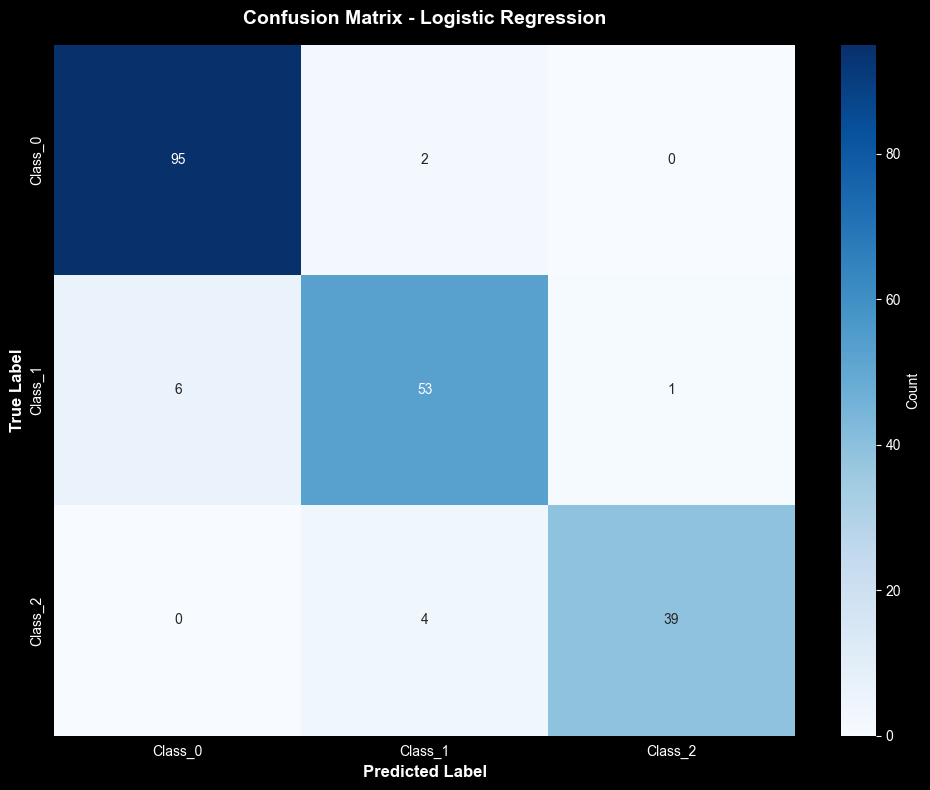

In [13]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix_logistic_regression.png', dpi=300, bbox_inches='tight')
print('✓ Saved: confusion_matrix_logistic_regression.png')
plt.show()

---
## Feature Coefficients

In [14]:
# Get feature coefficients
feature_names = X_train.columns
coefficients = model.coef_

print('Feature Coefficients by Class:')
print('='*60)

for i, class_name in enumerate(class_names):
    print(f'\n{class_name}:')
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients[i]
    }).sort_values('Coefficient', key=abs, ascending=False)
    print(coef_df.head(10).to_string(index=False))

Feature Coefficients by Class:

Class_0:
                    Feature  Coefficient
          Thickness_Loss_mm     6.249603
       Thickness_Loss_Ratio     1.100997
      Material_Loss_Percent     1.100967
               Thickness_mm     0.885075
        Remaining_Thickness    -0.818684
        Thickness_Loss_Rate     0.817930
         High_Pressure_Flag     0.494804
                 Time_Years     0.465649
               Pipe_Size_mm     0.457546
Pressure_to_Thickness_Ratio    -0.438402

Class_1:
                    Feature  Coefficient
       Thickness_Loss_Ratio     0.485113
      Material_Loss_Percent     0.484959
          Thickness_Loss_mm    -0.389593
               Pipe_Size_mm    -0.313092
         Pipe_Size_Category    -0.266543
    Critical_Threshold_Flag     0.246261
           Max_Pressure_psi     0.220081
   Corrosion_Impact_Percent     0.175434
Pressure_to_Thickness_Ratio    -0.140328
               Age_Category     0.137221

Class_2:
                    Feature  Coeffici

✓ Saved: feature_coefficients_logistic_regression.png


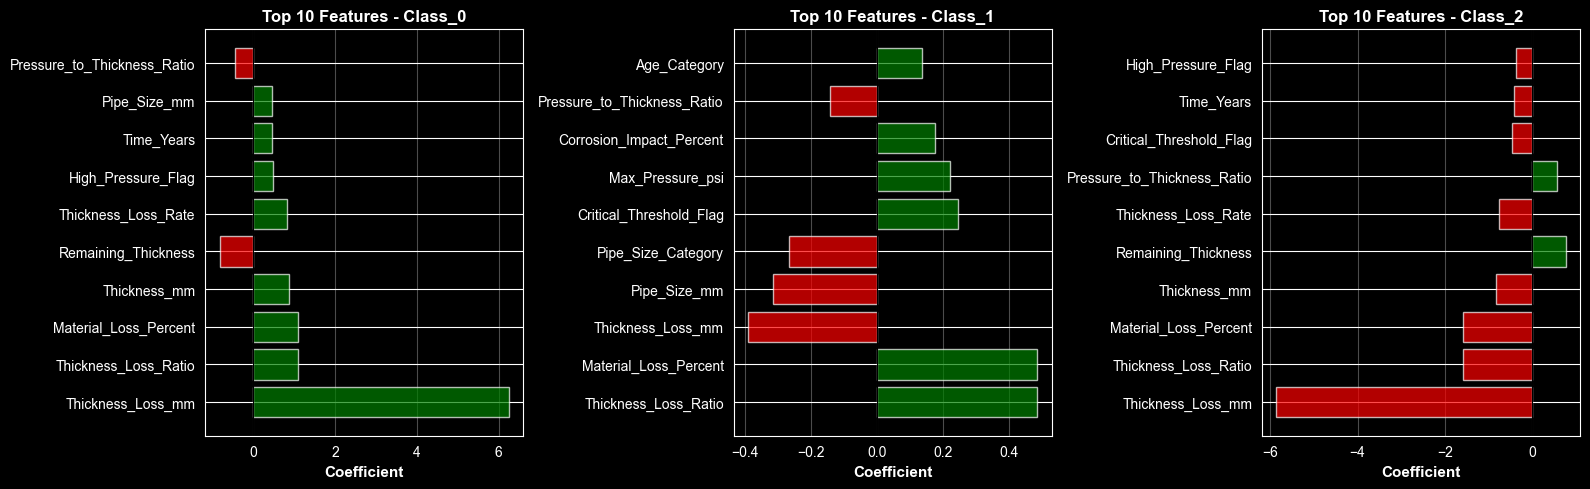

In [15]:
# Visualize top feature coefficients
fig, axes = plt.subplots(1, len(class_names), figsize=(16, 5))
if len(class_names) == 1:
    axes = [axes]

for i, class_name in enumerate(class_names):
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients[i]
    }).sort_values('Coefficient', key=abs, ascending=False).head(10)
    
    colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
    axes[i].barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, alpha=0.7)
    axes[i].set_xlabel('Coefficient', fontsize=11, fontweight='bold')
    axes[i].set_title(f'Top 10 Features - {class_name}', fontsize=12, fontweight='bold')
    axes[i].axvline(0, color='black', linewidth=0.8)
    axes[i].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('feature_coefficients_logistic_regression.png', dpi=300, bbox_inches='tight')
print('✓ Saved: feature_coefficients_logistic_regression.png')
plt.show()

---
## Save Results

In [16]:
# Save results
results = {
    'Model': 'Logistic Regression',
    'Training_Accuracy': round(train_accuracy, 4),
    'Test_Accuracy': round(test_accuracy, 4),
    'Features': X_train.shape[1],
    'Training_Samples': X_train.shape[0],
    'Test_Samples': X_test.shape[0]
}

results_df = pd.DataFrame([results])
results_df.to_csv('logistic_regression_results.csv', index=False)
print('✓ Saved: logistic_regression_results.csv')

# Save predictions
predictions_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Label': y_test_pred
})

# Add probability columns
for i, class_name in enumerate(class_names):
    predictions_df[f'Prob_{class_name}'] = y_test_proba[:, i]

predictions_df.to_csv('logistic_regression_predictions.csv', index=False)
print('✓ Saved: logistic_regression_predictions.csv')

✓ Saved: logistic_regression_results.csv
✓ Saved: logistic_regression_predictions.csv


---
## Summary

### Model: Logistic Regression
- **Algorithm:** Multi-class classification (One-vs-Rest)
- **Solver:** LBFGS
- **Scaling:** StandardScaler

### Performance:
- Check accuracy scores above
- Review classification report for per-class metrics
- Analyze confusion matrix for misclassifications

### Feature Analysis:
- Positive coefficients increase class probability
- Negative coefficients decrease class probability
- Larger absolute values = stronger influence

### Files Generated:
- confusion_matrix_logistic_regression.png
- feature_coefficients_logistic_regression.png
- logistic_regression_results.csv
- logistic_regression_predictions.csv

---
**Logistic Regression Complete!**